# Lecture 48: Global Activation Pooling

### Dataset used:- [ALL-IDB:Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/)
Follow the instructions provided in the linked website to download the dataset. After downloading, extract the files to the current directory (same folder as your codes).

In [1]:
%matplotlib inline
import os
import time
import copy
import tqdm
import torch
import random
import numpy as np
import torch.nn as nn
from PIL import Image
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader

print(torch.__version__) # This code has been updated for PyTorch 1.0.0

1.11.0


### Load Data

In [3]:
Datapath = 'ALL_IDB2/ALL_IDB2/img/'
listing = os.listdir(Datapath) 
random.shuffle(listing)

In [4]:
# ALL_IDB2 dataset has 260 images in total
TrainImages = torch.FloatTensor(200,3,224,224)
TrainLabels = torch.LongTensor(200)
TestImages = torch.FloatTensor(60,3,224,224)
TestLabels = torch.LongTensor(60)

# First 200 images are used for training and the remaining 60 for testing
img_no = 0
for file in listing:
    im=Image.open(Datapath + file)
    im = im.resize((224,224))
    im = np.array(im)   
    if img_no < 200:
        TrainImages[img_no] = torch.from_numpy(im).transpose(0,2).unsqueeze(0)
        TrainLabels[img_no] = int(listing[img_no][6:7])
    else:
        TestImages[img_no - 200] = torch.from_numpy(im).transpose(0,2).unsqueeze(0)
        TestLabels[img_no - 200] = int(listing[img_no][6:7])
    img_no = img_no + 1

In [5]:
print(TrainImages.size())
print(TrainLabels.size())
print(TestImages.size())
print(TestLabels.size())

torch.Size([200, 3, 224, 224])
torch.Size([200])
torch.Size([60, 3, 224, 224])
torch.Size([60])


In [6]:
# Check availability of GPU

use_gpu = torch.cuda.is_available()
# use_gpu = False # Uncomment in case of GPU memory error
if use_gpu:
    print('GPU is available!')
    device = "cuda"
    pinMem = True
else:
    print('GPU is not available!')
    device = "cpu"
    pinMem = False

GPU is available!


In [7]:
# Creating pytorch dataset
trainDataset = TensorDataset(TrainImages, TrainLabels)
testDataset = TensorDataset(TestImages, TestLabels)
# Creating dataloader
BatchSize = 32
trainLoader = DataLoader(trainDataset, batch_size=BatchSize, shuffle=True,num_workers=4, pin_memory=pinMem)
testLoader = DataLoader(testDataset, batch_size=BatchSize, shuffle=False,num_workers=4, pin_memory=pinMem)

### Initialize the network

In [8]:
# ResNet18
net = models.resnet18(pretrained=True)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 2)
print(net)
net = net.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\hazem/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define loss function and optimizer

In [9]:
criterion = nn.NLLLoss() # Negative Log-Likelihood
optimizer = optim.SGD(net.parameters(), lr=1e-3 , momentum=0.9) # Stochastic gradient descent

### Train the network

C:\Users\hazem\AppData\Local\Temp\ipykernel_20780\4091500462.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm.tqdm_notebook(trainLoader):


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 1 /15  ;  Training Loss: 0.292194 ; Training Acc: 94.000 ; Time consumed: 0m 6s 
At Iteration: 1 /15  ;  Testing Loss: 0.619455 ; Testing Acc: 65.000 ; Time consumed: 0m 6s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 2 /15  ;  Training Loss: 0.200776 ; Training Acc: 97.500 ; Time consumed: 0m 5s 
At Iteration: 2 /15  ;  Testing Loss: 0.582659 ; Testing Acc: 63.333 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 3 /15  ;  Training Loss: 0.149405 ; Training Acc: 96.500 ; Time consumed: 0m 5s 
At Iteration: 3 /15  ;  Testing Loss: 0.442958 ; Testing Acc: 85.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 4 /15  ;  Training Loss: 0.103648 ; Training Acc: 98.500 ; Time consumed: 0m 5s 
At Iteration: 4 /15  ;  Testing Loss: 0.320423 ; Testing Acc: 88.333 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 5 /15  ;  Training Loss: 0.060403 ; Training Acc: 99.500 ; Time consumed: 0m 5s 
At Iteration: 5 /15  ;  Testing Loss: 0.164917 ; Testing Acc: 95.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 6 /15  ;  Training Loss: 0.034683 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 6 /15  ;  Testing Loss: 0.136799 ; Testing Acc: 96.667 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 7 /15  ;  Training Loss: 0.031138 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 7 /15  ;  Testing Loss: 0.090853 ; Testing Acc: 98.333 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 8 /15  ;  Training Loss: 0.024409 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 8 /15  ;  Testing Loss: 0.088956 ; Testing Acc: 100.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 9 /15  ;  Training Loss: 0.024176 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 9 /15  ;  Testing Loss: 0.067643 ; Testing Acc: 100.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 10 /15  ;  Training Loss: 0.045395 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 10 /15  ;  Testing Loss: 0.056658 ; Testing Acc: 100.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 11 /15  ;  Training Loss: 0.024692 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 11 /15  ;  Testing Loss: 0.066885 ; Testing Acc: 100.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 12 /15  ;  Training Loss: 0.024359 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 12 /15  ;  Testing Loss: 0.055063 ; Testing Acc: 100.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 13 /15  ;  Training Loss: 0.013219 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 13 /15  ;  Testing Loss: 0.092170 ; Testing Acc: 96.667 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 14 /15  ;  Training Loss: 0.017153 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 14 /15  ;  Testing Loss: 0.094155 ; Testing Acc: 95.000 ; Time consumed: 0m 5s 


  0%|          | 0/7 [00:00<?, ?it/s]

At Iteration: 15 /15  ;  Training Loss: 0.021044 ; Training Acc: 100.000 ; Time consumed: 0m 5s 
At Iteration: 15 /15  ;  Testing Loss: 0.073919 ; Testing Acc: 96.667 ; Time consumed: 0m 5s 
Training completed in 1m 19s


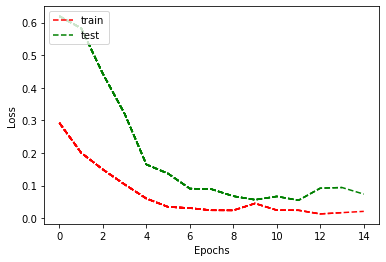

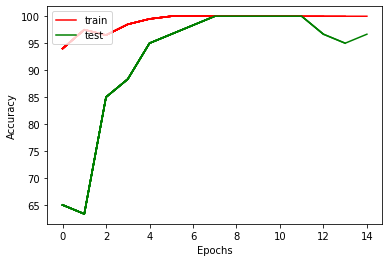

In [11]:
iterations = 15
trainLoss = []
trainAcc = []
testLoss = []
testAcc = []
start = time.time()

for epoch in range(iterations):
    epochStart = time.time()
    runningLoss = 0   
    runningCorr = 0
    net.train() # For training
    for data in tqdm.tqdm_notebook(trainLoader):
        inputs,labels = data
        inputs, labels = inputs.to(device), labels.long().to(device)          
       
        inputs = inputs/255.0
        # Feed-forward input data through the network
        outputs = net(inputs)
        # Compute loss/error
        loss = criterion(F.log_softmax(outputs,dim=1), labels) 
        
        _, predicted = torch.max(outputs.data, 1)
        # Initialize gradients to zero
        optimizer.zero_grad()                  
        # Backpropagate loss and compute gradients
        loss.backward()
        # Update the network parameters
        optimizer.step()
        # Accumulate loss per batch
        runningLoss += loss.item()  
        # Accumuate correct predictions per batch
        runningCorr += (predicted == labels.data).sum()
    avgTrainLoss = runningLoss/(200.0/BatchSize)
    avgTrainAcc = 100*float(runningCorr)/200.0
    trainLoss.append(avgTrainLoss)
    trainAcc.append(avgTrainAcc)
    
    # Evaluating performance on test set for each epoch
    net.eval() # For testing
    test_runningCorr = 0
    test_runningLoss = 0
    with torch.no_grad():
        for data in testLoader:
            inputs,labels = data
            inputs, labels = inputs.to(device), labels.long().to(device)  
            inputs = inputs/255
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)    
             # Compute loss/error
            loss = criterion(F.log_softmax(outputs,dim=1), labels)      
            # Accumulate loss per batch
            test_runningLoss += loss.item()  
            # Accumuate correct predictions per batch
            test_runningCorr += (predicted == labels.data).sum()
    avgTestLoss = test_runningLoss/(60.0/BatchSize)
    avgTestAcc = 100*float(test_runningCorr)/60.0
    testAcc.append(avgTestAcc)
    testLoss.append(avgTestLoss)
        
    # Plotting Loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epoch+1),trainLoss,'r--',label='train')        
    plt.plot(range(epoch+1),testLoss,'g--',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')    
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epoch+1),trainAcc,'r-',label='train') 
    plt.plot(range(epoch+1),testAcc,'g-',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')    
    
    epochEnd = time.time()-epochStart
    print('At Iteration: {:.0f} /{:.0f}  ;  Training Loss: {:.6f} ; Training Acc: {:.3f} ; Time consumed: {:.0f}m {:.0f}s '\
          .format(epoch + 1,iterations,avgTrainLoss,avgTrainAcc,epochEnd//60,epochEnd%60))
    print('At Iteration: {:.0f} /{:.0f}  ;  Testing Loss: {:.6f} ; Testing Acc: {:.3f} ; Time consumed: {:.0f}m {:.0f}s '\
          .format(epoch + 1,iterations,avgTestLoss,avgTestAcc,epochEnd//60,epochEnd%60))
end = time.time()-start
print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))

In [12]:
# Extracting the convolutional layers of the network
conv_net = nn.Sequential(*list(net.children())[:-2])
print(conv_net)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [13]:
# Copying weights of the final layer for obtaining the segmented output
weights = copy.deepcopy(net.fc.weight.data)
if use_gpu:
    weights = weights.cpu()
weights = weights.numpy()
print(weights.shape)

(2, 512)


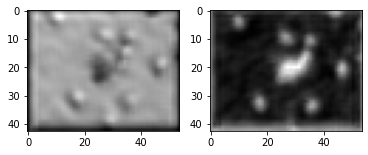

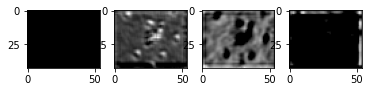

In [17]:
# Loading one sample image for testing
testPath = 'ALL_IDB1/ALL_IDB1/im/'
testImages = os.listdir(testPath)
img1 = plt.imread(testPath+testImages[0])
testInput = torch.from_numpy(img1).transpose(0,2).transpose(1,2).unsqueeze(0).float().to(device)
# Feed-forward
out = conv_net(testInput)  

# Visualization
if use_gpu:
    out_np = out.squeeze(0).data.cpu().numpy()
else:
    out_np = out.squeeze(0).data.numpy()

mask1 = np.ones(out_np.shape)
for n1 in range(512):
    mask1[n1] = weights[0,n1]*mask1[n1]
outImg1 = np.sum(np.multiply(mask1,out_np),axis=0)

# Averaged activation map
plt.figure()
plt.subplot(121)
plt.imshow(np.sum(out_np,axis=0)/512,cmap='gray')
# Weighted-sum activation map
plt.subplot(122)
plt.imshow(outImg1,cmap='gray')

# Activation maps chosen at random
plt.figure()
randIdx = np.random.randint(0,511,4)
plt.subplot(141)
plt.imshow(out_np[randIdx[0]],cmap='gray')
plt.subplot(142)
plt.imshow(out_np[randIdx[1]],cmap='gray')
plt.subplot(143)
plt.imshow(out_np[randIdx[2]],cmap='gray')
plt.subplot(144)
plt.imshow(out_np[randIdx[3]],cmap='gray')

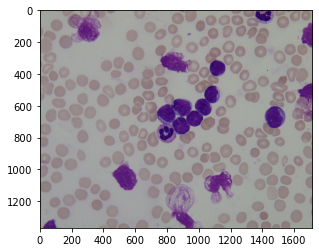

In [18]:
plt.imshow(img1)